In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
training_dir="fire_dataset/Train"
validation_dir="fire_dataset/Validation"


In [3]:
training_data_generator=ImageDataGenerator(rescale=1./255,
                                           horizontal_flip=True,
                                           vertical_flip=True,
                                           height_shift_range=0.2,
                                           width_shift_range=0.2,
                                           rotation_range=45,
                                           fill_mode="nearest")
validation_data_generator=ImageDataGenerator(rescale=1./255)
train_generator=training_data_generator.flow_from_directory(training_dir,target_size=(224,224),
                                                              class_mode="categorical",batch_size=16)
validation_generator=validation_data_generator.flow_from_directory(validation_dir,target_size=(224,224),
                                                              class_mode="categorical",batch_size=16)

Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [4]:
# import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [5]:
input_shape=(224,224,3)
model=Sequential()
model.add(Conv2D(96,(11,11),strides=(4,4),activation="relu",input_shape=input_shape))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

model.add(Conv2D(256,(5,5),activation="relu"))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

model.add(Conv2D(512,(5,5),activation="relu"))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(2048,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(2,activation="softmax"))

In [6]:
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 512)         3277312   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 512)         0

In [8]:
history=model.fit(train_generator,steps_per_epoch=15,epochs=50,validation_data=validation_generator,validation_steps=None)

Epoch 1/50
15/15 [==============================] - 34s 2s/step - loss: 0.8385 - accuracy: 0.7500 - val_loss: 0.4436 - val_accuracy: 0.7538
Epoch 2/50
15/15 [==============================] - 30s 2s/step - loss: 0.3606 - accuracy: 0.7583 - val_loss: 0.3535 - val_accuracy: 0.7538
Epoch 3/50
15/15 [==============================] - 29s 2s/step - loss: 0.3923 - accuracy: 0.7625 - val_loss: 0.5077 - val_accuracy: 0.6332
Epoch 4/50
15/15 [==============================] - 29s 2s/step - loss: 0.4712 - accuracy: 0.7292 - val_loss: 0.3545 - val_accuracy: 0.7538
Epoch 5/50
15/15 [==============================] - 31s 2s/step - loss: 0.3564 - accuracy: 0.8083 - val_loss: 0.4860 - val_accuracy: 0.6583
Epoch 6/50
15/15 [==============================] - 34s 2s/step - loss: 0.6305 - accuracy: 0.6708 - val_loss: 0.5504 - val_accuracy: 0.7085
Epoch 7/50
15/15 [==============================] - 31s 2s/step - loss: 0.4490 - accuracy: 0.7417 - val_loss: 0.3065 - val_accuracy: 0.7538
Epoch 8/50
15/15 [==

In [9]:
import matplotlib.pyplot as plt
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(0,50)

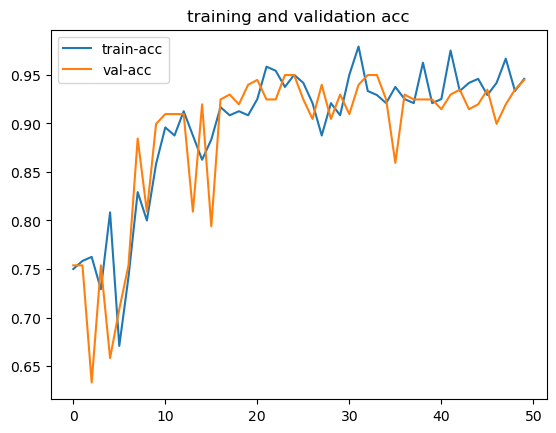

<Figure size 640x480 with 0 Axes>

In [10]:
plt.plot(epochs,acc,label="train-acc")
plt.plot(epochs,val_acc,label="val-acc")
plt.title("training and validation acc")
plt.legend(loc=0)
plt.figure()
plt.show()

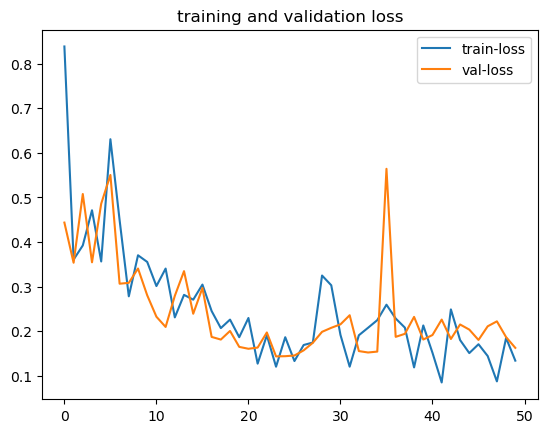

<Figure size 640x480 with 0 Axes>

In [11]:
plt.plot(epochs,loss,label="train-loss")
plt.plot(epochs,val_loss,label="val-loss")
plt.title("training and validation loss")
plt.legend(loc=0)
plt.figure()
plt.show()

In [12]:
model.save("model-fire.h5")

C:\Users\Ertuğrul\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import cv2
import numpy as np
from keras.models import load_model


In [2]:
model=load_model("model-fire.h5")

In [21]:
path="fire_dataset/Test/non-fire2.jpg"
test_img=cv2.imread(path)
img=np.asarray(test_img)
img=cv2.resize(img,(224,224))
img=img/255
print(img.shape)

(224, 224, 3)


In [22]:
img=img.reshape(1,224,224,3)
img.shape

(1, 224, 224, 3)

In [23]:
prediction=model.predict(img)
print(prediction)
pred=max(prediction[0])
pred

1/1 [==============================] - 0s 24ms/step
[[0.06240632 0.93759364]]


0.93759364

In [24]:
pred=np.argmax(prediction[0])
pred

1

In [25]:
prob=prediction[0][pred]
prob

0.93759364

In [26]:
prob_y="{:.2f}".format(prob)

In [27]:
if pred==1:
    label="no fire"
else:
    label="fire"

In [28]:
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(test_img,label,(35,50),font,1,(255,0,0),2)
cv2.putText(test_img,label,(35,50),font,1,(255,0,0),2)
cv2.imshow("result: ",test_img)
cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

In [12]:
video_path="fire_dataset/Test/firevideo.mp4"
cap=cv2.VideoCapture(video_path)
while True:
    ret,frame=cap.read()
    img=np.asarray(frame)
    img=cv2.resize(img,(224,224))
    img=img/255
    img=img.reshape(1,224,224,3)
    prediction=model.predict(img)
    pred=max(prediction[0])
    pred=np.argmax(prediction[0])
    prob=prediction[0][pred]
    prob_y="{:.2f}".format(prob)
    if prob<0.5:
        label="no fire"
    else:
        label="fire"

    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,label,(35,50),font,1,(255,0,0),2)
    cv2.putText(frame,prob_y,(35,80),font,1,(255,0,0),2)
    cv2.imshow("Result: ",frame)
    if cv2.waitKey(1) & 0xFF == ord(chr(27)):
        break
    
cap.release()
cv2.destroyAllWindows()  

1/1 [==============================] - 0s 21ms/step
